<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# Qiskit Exploration: CNot
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2022
University of Illinois Board of Trustees. All Rights Reserved.

# imports

In [1]:
import qiskit
import numpy
import pandas

## conveniences

In [2]:
def find_backend(verbose=False):
    backends={}
    for backend in provider.backends():
        try:
            qubit_count = len(backend.properties().qubits)
        except:
            qubit_count = numpy.inf

        if qubit_count>=2:
            backends[backend.name()]=backend.status().pending_jobs
            if verbose:
                print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")
    backends_series=pandas.Series(backends)
    return backends_series.idxmin()

DEFAULT_BACKEND="ibmq_qasm_simulator"

# main

Let's explore a CNoT.  A CNoT gate flips a *target* bit if a *control* bit is 1.  If the 0th bit is the control and the first bit is the target, we have
- 0,0 to 0,0
- 0,1 to 0,1
- 1,0 to 1,1
- 1,1 to 1,0
Looking at this truth table, the resulting target bit is the exclusive or of the input target and control bits.

In [3]:
tokenfile="../token.txt"
qiskit.IBMQ.save_account(open(tokenfile, "r").read())
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider("ibm-q")

configrc.store_credentials:WARNING:2022-05-19 22:26:07,400: Credentials already present. Set overwrite=True to overwrite.


## 0,0 becomes 0,0

In [4]:
circuit = qiskit.QuantumCircuit(2,2)
circuit.cx(0,1) #bit 0 is control, bit 1 is target; output should be 1,1
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌─┐   
q_0: ──■──┤M├───
     ┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1

In [5]:
#bestbackend=find_backend()
#print("\nbest backend seems to be {0:s}".format(bestbackend))
backend = provider.get_backend(DEFAULT_BACKEND)
job = qiskit.execute(circuit, backend = backend, shots = 100)
qiskit.tools.monitor.job_monitor(job)

Job Status: job has successfully run


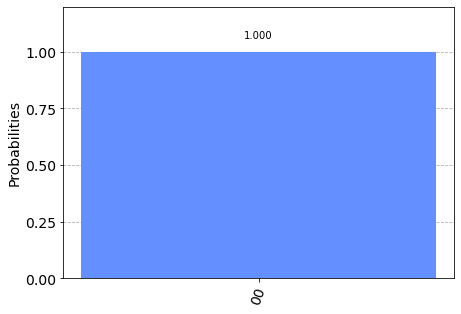

In [6]:
result = job.result()
counts = result.get_counts(circuit)
qiskit.visualization.plot_histogram([counts])

## 0,1 becomes 0,1

In [7]:
circuit = qiskit.QuantumCircuit(2,2)
circuit.x(1) #state is now 0,1
circuit.cx(0,1) #bit 0 is control, bit 1 is target; output should be 0,1 (but reversed order)
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌─┐   
q_0: ───────■──┤M├───
     ┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [8]:
#bestbackend=find_backend()
#print("\nbest backend seems to be {0:s}".format(bestbackend))
backend = provider.get_backend(DEFAULT_BACKEND)
job = qiskit.execute(circuit, backend = backend, shots = 100)
qiskit.tools.monitor.job_monitor(job)

Job Status: job has successfully run


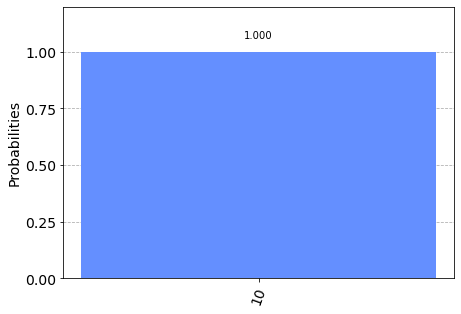

In [9]:
result = job.result()
counts = result.get_counts(circuit)
qiskit.visualization.plot_histogram([counts])

## 1,0 becomes 1,1

In [10]:
circuit = qiskit.QuantumCircuit(2,2)
circuit.x(0) #state is now 1,0
circuit.cx(0,1) #bit 0 is control, bit 1 is target; output should be 1,1
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [11]:
#bestbackend=find_backend()
#print("\nbest backend seems to be {0:s}".format(bestbackend))
backend = provider.get_backend(DEFAULT_BACKEND)
job = qiskit.execute(circuit, backend = backend, shots = 100)
qiskit.tools.monitor.job_monitor(job)

Job Status: job has successfully run


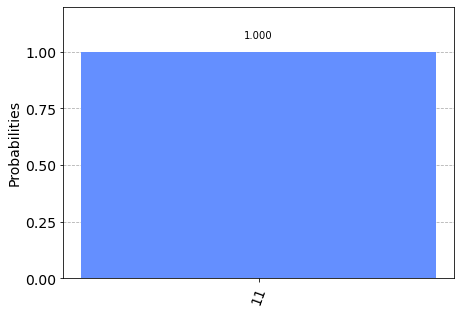

In [12]:
result = job.result()
counts = result.get_counts(circuit)
qiskit.visualization.plot_histogram([counts])

## 1,1 becomes 1,0

In [13]:
circuit = qiskit.QuantumCircuit(2,2)
circuit.x(0)
circuit.x(1) #state is now 1,1
circuit.cx(0,1) #bit 0 is control, bit 1 is target; output should be 1,0 (reversed)
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [14]:
#bestbackend=find_backend()
#print("\nbest backend seems to be {0:s}".format(bestbackend))
backend = provider.get_backend(DEFAULT_BACKEND)
job = qiskit.execute(circuit, backend = backend, shots = 100)
qiskit.tools.monitor.job_monitor(job)

Job Status: job has successfully run


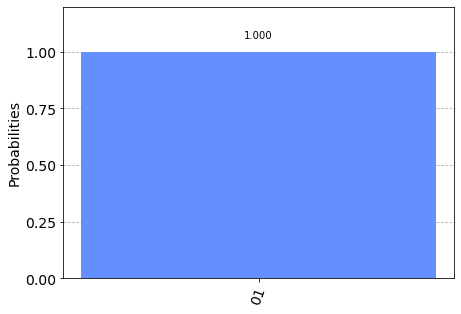

In [15]:
result = job.result()
counts = result.get_counts(circuit)
qiskit.visualization.plot_histogram([counts])